In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-zs-LIAF)

We'll measure the error at the time $t=1$.

In [2]:
du_dt = @(t, u) u;
u_exact = @exp;
a = 0;  b = 1;
n = [5, 10, 20, 40, 60]';
err = zeros(size(n));
for j = 1:length(n)
    h = (b - a) / n(j);
    t = a + h *(0:n(j));
    u = [1, u_exact(h), zeros(1, n(j) - 1)];
    f = [du_dt(t(1), u(1)), zeros(1, n(j) - 2)];
    for i = 2:n(j)
        f(i) = du_dt(t(i), u(i));
        u(i+1) = -4*u(i) + 5*u(i-1) + h * (4*f(i) + 2*f(i-1));
    end
    err(j) = abs(u_exact(b) - u(end));
end

h = (b-a) ./ n;
disp(table(n, h, err))

    n        h           err    
    __    ________    __________

     5         0.2      0.016045
    10         0.1        2.8455
    20        0.05    1.6225e+06
    40       0.025    9.3442e+18
    60    0.016667    1.7401e+32



The error starts out promisingly, but things explode from there. A graph of the last numerical attempt yields a clue.

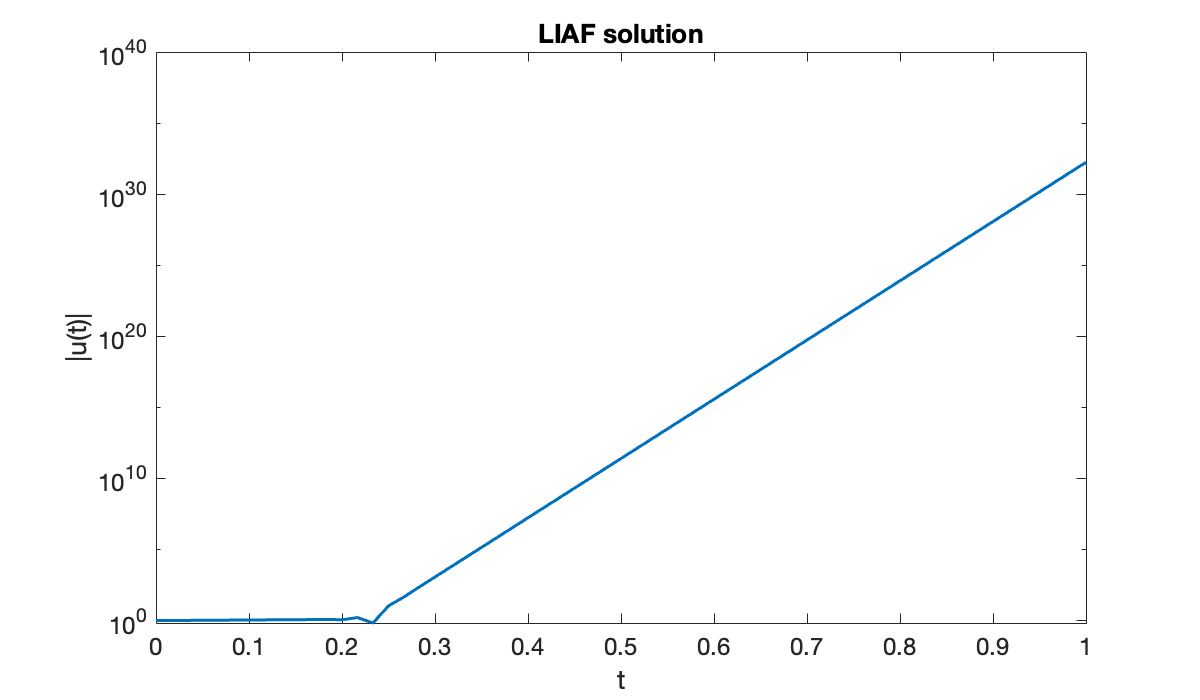

In [3]:
clf
semilogy(t, abs(u))
xlabel("t");  ylabel("|u(t)|")
title(("LIAF solution"));

It's clear that the solution is growing exponentially in time.